In [1]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [3]:
dataset <- read.csv("netflix.csv")

In [4]:
dim(dataset)

[1] 1000    7


In [5]:
summary(dataset)

               title         rating   
 13 Reasons Why   :  8   TV-14  :234  
 Girlboss         :  7   PG     :170  
 Prison Break     :  7   TV-MA  :148  
 Anastasia        :  6   G      :138  
 Dinotrux         :  6   TV-Y   : 68  
 Grace and Frankie:  6   TV-PG  : 59  
 (Other)          :960   (Other):183  
                                                                        ratingLevel 
 Parents strongly cautioned. May be unsuitable for children ages 14 and under.:224  
 General Audiences. Suitable for all ages.                                    :134  
 Suitable for all ages.                                                       :120  
 For mature audiences.  May not be suitable for children 17 and under.        :110  
                                                                              : 59  
 Parental guidance suggested. May not be suitable for all children.           : 54  
 (Other)                                                                      :299  
 ratingD

In [7]:
validation_index <- createDataPartition(dataset$user.rating.size, p=0.80, list=FALSE)

In [8]:
validation <- dataset[-validation_index,]

In [9]:
dataset <- dataset[validation_index,]

In [10]:
sapply(dataset, class)

            title            rating       ratingLevel ratingDescription 
         "factor"          "factor"          "factor"         "integer" 
     release.year user.rating.score  user.rating.size 
        "integer"         "integer"         "integer" 


In [11]:
head(dataset)

                  title rating
2   Lucky Number Slevin      R
3        Grey's Anatomy  TV-14
5 How I Met Your Mother  TV-PG
7          Breaking Bad  TV-MA
8   The Vampire Diaries  TV-14
9      The Walking Dead  TV-MA
                                                                    ratingLevel
2                            strong violence, sexual content and adult language
3 Parents strongly cautioned. May be unsuitable for children ages 14 and under.
5            Parental guidance suggested. May not be suitable for all children.
7         For mature audiences.  May not be suitable for children 17 and under.
8 Parents strongly cautioned. May be unsuitable for children ages 14 and under.
9         For mature audiences.  May not be suitable for children 17 and under.
  ratingDescription release.year user.rating.score user.rating.size
2               100         2006                NA               82
3                90         2016                98               80
5                70

In [12]:
tail(dataset)

                        title rating
994 Wiener Dog Internationals      G
995                  Pup Star      G
996                   The BFG     PG
997   The Secret Life of Pets     PG
998          Precious Puppies   TV-G
999               Beary Tales   TV-G
                                                  ratingLevel ratingDescription
994                 General Audiences. Suitable for all ages.                35
995                 General Audiences. Suitable for all ages.                35
996 for action/peril, some scary moments and brief rude humor                60
997                            for action and some rude humor                60
998                                    Suitable for all ages.                35
999                                    Suitable for all ages.                35
    release.year user.rating.score user.rating.size
994         2015                NA               82
995         2016                NA               82
996         2016         

In [13]:
levels(dataset$rating)

 [1] "G"        "NR"       "PG"       "PG-13"    "R"        "TV-14"   
 [7] "TV-G"     "TV-MA"    "TV-PG"    "TV-Y"     "TV-Y7"    "TV-Y7-FV"
[13] "UR"      


In [31]:
percentage <- prop.table(table(dataset$rating)) * 100
cbind(freq=table(dataset$rating), percentage=percentage)

         freq percentage
G          98     12.250
NR         12      1.500
PG        134     16.750
PG-13      11      1.375
R          18      2.250
TV-14     194     24.250
TV-G       41      5.125
TV-MA     124     15.500
TV-PG      44      5.500
TV-Y       57      7.125
TV-Y7      31      3.875
TV-Y7-FV   36      4.500
UR          0      0.000


In [17]:
x <- dataset[,4:7]
y <- dataset[,2]

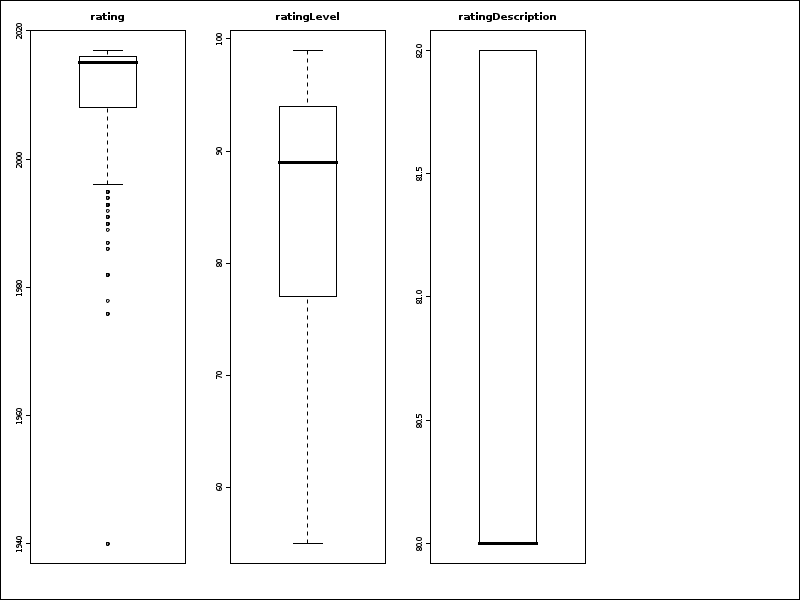

In [33]:
par(mfrow=c(1,4))
  for(i in 2:4) {
  boxplot(x[,i], main=names(dataset)[i])
}

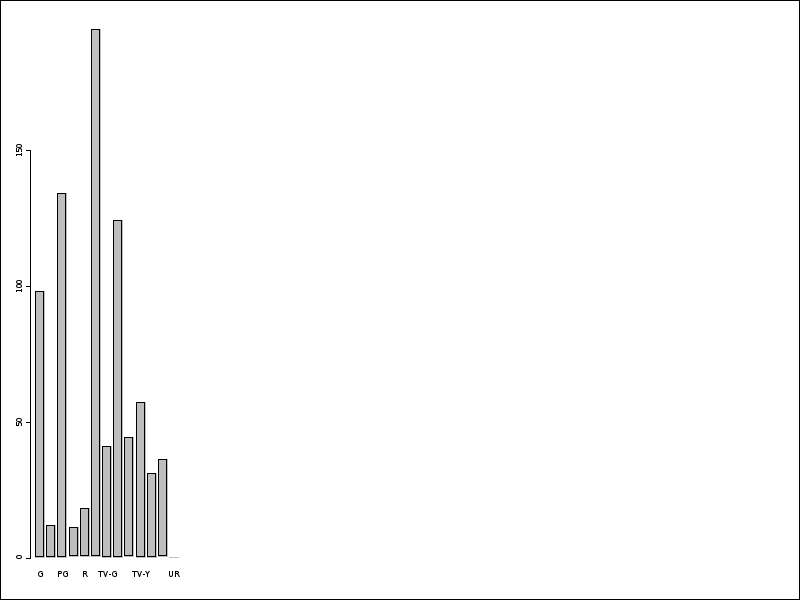

In [64]:
plot(y)

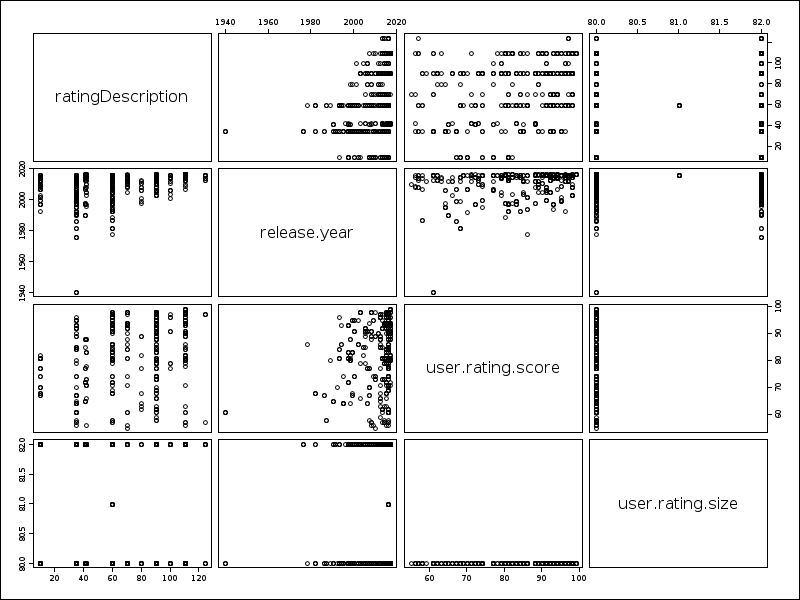

In [36]:
plot(x)

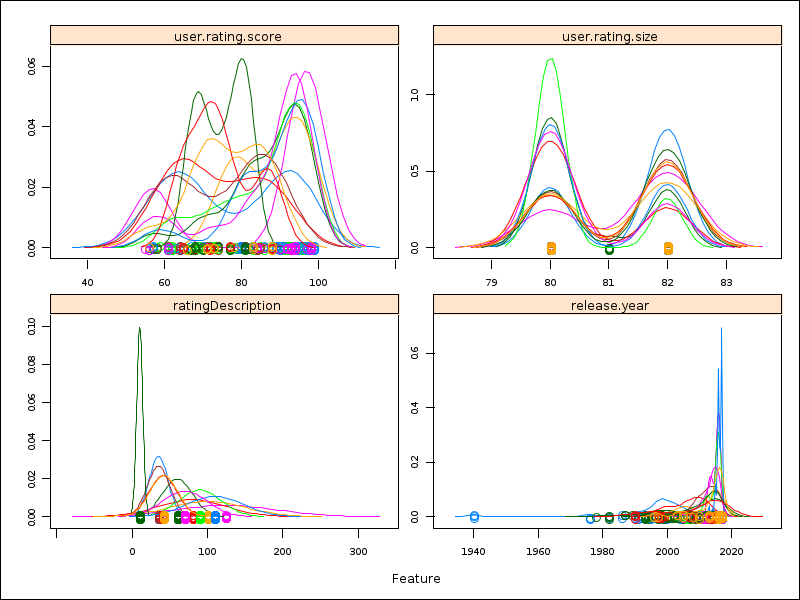

In [45]:
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)